In [2]:
import os
import librosa
import numpy as np
import pandas as pd

#Set the path to your dataset folder
base_path = r"C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children" # <- CHANGE THIS TO YOUR PATH

#Define feature extraction function
def extract_features(folder_path, dataset_type):
    data = []
    for label in os.listdir(folder_path):
        class_path = os.path.join(folder_path, label)
        if not os.path.isdir(class_path):
            continue
        for file in os.listdir(class_path):
            if file.endswith(".wav"):
                file_path = os.path.join(class_path, file)
                print("Processing:", file_path)  # ✅ Optional: for debug
                try:
                    y, sr = librosa.load(file_path)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                    mfcc_mean = np.mean(mfcc.T, axis=0)
                    data.append({
                        **{f"MFCC{i+1}": mfcc_mean[i] for i in range(13)},
                        "Label": label,
                        "Set": dataset_type
                    })
                except Exception as e:
                    print(f"Error in {file_path}: {e}")
    return data

#Extract from Train and Test
train_data = extract_features(os.path.join(base_path, "Train"), "Train")
test_data  = extract_features(os.path.join(base_path, "Test"), "Test")

#Combine into a DataFrame
full_data = pd.DataFrame(train_data + test_data)

#Save to CSV
full_data.to_csv("extracted_audio_features.csv", index=False)

#Quick Preview
print(f"\nTrain samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
full_data.head()
   

Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Train\Child\1002_0.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Train\Child\1002_0_left.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Train\Child\1002_0_patch.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Train\Child\1002_0_right.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Da

C:\Users\ygred\AppData\Local\Temp\ipykernel_36304\1797386843.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Test\Normal\1112_27_patch.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Test\Normal\1112_27_right.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Test\Normal\1112_28.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signal Dataset for Danger Detection of Women and Children\Test\Normal\1112_28_left.wav
Processing: C:\Users\ygred\OneDrive\Documents\ML\ML PROJECT\Audio Signal Dataset for Danger Detection of Women and Children\Audio Signa

MFCC1       MFCC2       MFCC3      MFCC4      MFCC5      MFCC6  \
0  829.499573  114.506195 -131.909363  77.834770 -16.713331  12.311367   
1  829.151611  112.777657 -128.859558  74.368530 -13.619775  13.094767   
2  809.951172   71.185722 -106.425629  85.858299 -34.058357  29.282867   
3  808.713684  109.182930 -126.484856  74.436760 -16.877878  11.203026   
4  824.618164  131.524460 -138.128464  88.719696 -20.100609   8.207711   

       MFCC7      MFCC8      MFCC9     MFCC10     MFCC11     MFCC12  \
0  12.597623 -38.406620  23.400122 -13.268039   1.271719  -0.408318   
1  11.430612 -34.816597  21.613928 -12.850266   1.573083  -0.407857   
2 -28.885246  -6.602008  12.871825 -20.887379  10.197582 -17.843693   
3  12.635144 -36.997543  22.446432 -12.368085   0.083934  -0.979882   
4   9.629998 -38.892498  24.184883 -19.380568   5.787307   5.685862   

      MFCC13  Label    Set  
0 -18.026237  Child  Train  
1 -18.098862  Child  Train  
2  18.425575  Child  Train  
3 -17.182869  Child  Train  
4 -23.466093  Child  Train

In [3]:
#loading the data
import pandas as pd
df = pd.read_csv("extracted_audio_features.csv")
df.head()

MFCC1       MFCC2       MFCC3      MFCC4      MFCC5      MFCC6  \
0  829.49960  114.506195 -131.909360  77.834770 -16.713331  12.311367   
1  829.15160  112.777660 -128.859560  74.368530 -13.619775  13.094767   
2  809.95120   71.185720 -106.425630  85.858300 -34.058357  29.282867   
3  808.71370  109.182930 -126.484856  74.436760 -16.877878  11.203026   
4  824.61816  131.524460 -138.128460  88.719696 -20.100609   8.207711   

       MFCC7      MFCC8      MFCC9     MFCC10     MFCC11     MFCC12  \
0  12.597623 -38.406620  23.400122 -13.268039   1.271719  -0.408318   
1  11.430612 -34.816597  21.613928 -12.850266   1.573083  -0.407857   
2 -28.885246  -6.602008  12.871825 -20.887379  10.197582 -17.843693   
3  12.635144 -36.997543  22.446432 -12.368085   0.083934  -0.979882   
4   9.629998 -38.892498  24.184883 -19.380568   5.787307   5.685862   

      MFCC13  Label    Set  
0 -18.026237  Child  Train  
1 -18.098862  Child  Train  
2  18.425575  Child  Train  
3 -17.182869  Child  Train  
4 -23.466093  Child  Train

In [5]:
#A1 
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("extracted_audio_features.csv")

# Drop non-feature columns
X = df.drop(columns=["Label", "Set"])
y = df["Label"]

# Auto-detect two most frequent classes
class_counts = y.value_counts()
class1, class2 = class_counts.index[:2]

# Get feature vectors for each class
vecs1 = X[y == class1].values
vecs2 = X[y == class2].values

# Compute class centroids
centroid1 = vecs1.mean(axis=0)
centroid2 = vecs2.mean(axis=0)

# Compute spread
spread1 = vecs1.std(axis=0)
spread2 = vecs2.std(axis=0)

# Compute Euclidean distance between class centroids
interclass_distance = np.linalg.norm(centroid1 - centroid2)

# Print output
print(f"Class 1: {class1}, Samples: {vecs1.shape[0]}")
print(f"Class 2: {class2}, Samples: {vecs2.shape[0]}\n")

print(f"Centroid of {class1} (first 5 dims): {centroid1[:5]} ...")
print(f"Spread of {class1} (first 5 dims): {spread1[:5]} ...\n")

print(f"Centroid of {class2} (first 5 dims): {centroid2[:5]} ...")
print(f"Spread of {class2} (first 5 dims): {spread2[:5]} ...\n")

print(f"Interclass Distance between {class1} and {class2}: {interclass_distance:.4f}")


Class 1: Child, Samples: 6488
Class 2: Women, Samples: 6427

Centroid of Child (first 5 dims): [730.26594883  87.79780672 -62.20043209  26.08561526 -39.82336587] ...
Spread of Child (first 5 dims): [89.82479895 36.59761022 27.13278102 21.73260599 19.95111111] ...

Centroid of Women (first 5 dims): [796.91363927  83.16547278 -69.90372867   7.92161704 -30.74497959] ...
Spread of Women (first 5 dims): [81.02050118 43.020176   29.48799688 25.73850229 24.51515856] ...

Interclass Distance between Child and Women: 73.0138


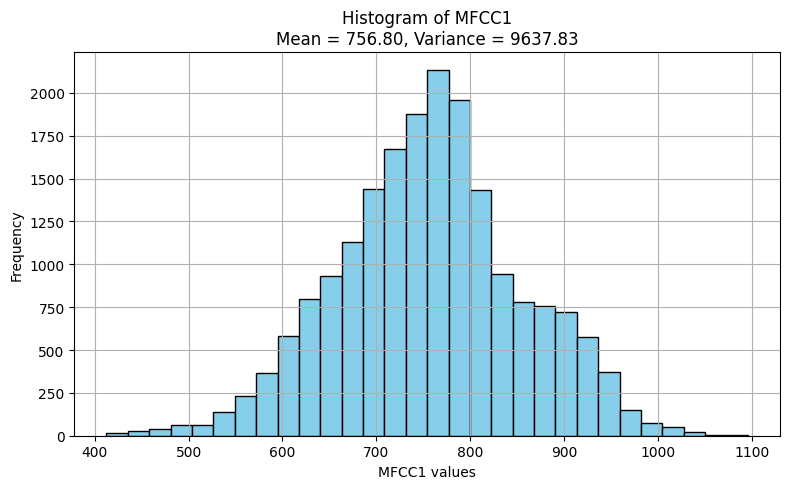

Feature selected: MFCC1
Mean: 756.8045
Variance: 9637.8337


In [6]:
#A2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("extracted_audio_features.csv")

# Drop non-feature columns
X = df.drop(columns=["Label", "Set"])

# Select any one feature, e.g., the first one (MFCC1)
feature = X.columns[0]
values = X[feature].values

# Calculate mean and variance
mean_val = np.mean(values)
var_val = np.var(values)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(values, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {feature}\nMean = {mean_val:.2f}, Variance = {var_val:.2f}')
plt.xlabel(f'{feature} values')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig("A2_histogram.png")  # Save the plot for Overleaf
plt.show()

# Print values
print(f"Feature selected: {feature}")
print(f"Mean: {mean_val:.4f}")
print(f"Variance: {var_val:.4f}")

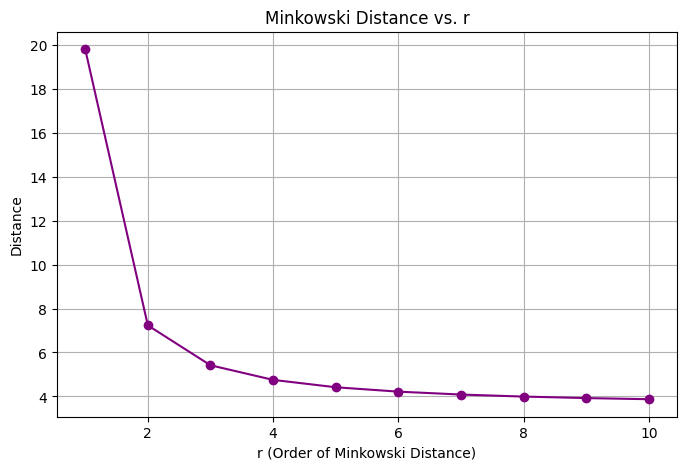

In [9]:
#A3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load the combined features CSV (make sure you've already run the extraction)
df = pd.read_csv("extracted_audio_features.csv")

# Select first two feature vectors
v1 = df.iloc[0, :-2].values  # drop filename and label
v2 = df.iloc[1, :-2].values

# Calculate Minkowski distances for r = 1 to 10
r_values = list(range(1, 11))
distances = [minkowski(v1, v2, p=r) for r in r_values]

# Plot the distances
plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', color='purple')
plt.title("Minkowski Distance vs. r")
plt.xlabel("r (Order of Minkowski Distance)")
plt.ylabel("Distance")
plt.grid(True)

# Save and show the plot
plt.savefig("A3_minkowski_distance.png")
plt.show()

In [14]:
#A4
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("extracted_audio_features.csv")

# Automatically detect label column (like 'label', 'class', etc.)
label_col = [col for col in df.columns if col.lower() in ['label', 'class', 'category']][0]

# Filter only 'Child' and 'Woman' classes
df_filtered = df[df[label_col].isin(['Child', 'Woman'])]

# Drop only the label column (since 'filename' doesn't exist in your case)
X = df_filtered.drop(columns=[label_col])
y = df_filtered[label_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output results
print("✅ Train size:", len(X_train))
print("✅ Test size:", len(X_test))

✅ Train size: 4541
✅ Test size: 1947


In [16]:
#A5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop any non-numeric columns like 'filename' or 'dataset'
X_train_clean = X_train.select_dtypes(include=['number'])
X_test_clean = X_test.select_dtypes(include=['number'])

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_clean, y_train)

# Predict
y_pred = knn.predict(X_test_clean)

# Evaluation
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ Classification Report:
               precision    recall  f1-score   support

       Child       1.00      1.00      1.00      1947

    accuracy                           1.00      1947
   macro avg       1.00      1.00      1.00      1947
weighted avg       1.00      1.00      1.00      1947

✅ Confusion Matrix:
 [[1947]]
✅ Accuracy: 1.0


C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [24]:
#A6
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split

# Load CSV
df = pd.read_csv("extracted_audio_features.csv")

# Filter for only two classes
df_filtered = df[df['Label'].isin(['Child', 'Woman'])]

# Drop non-numeric/non-feature columns
X = df_filtered.drop(columns=['Label', 'Set'])  # Only MFCCs remain
y = df_filtered['Label']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# A6 – Evaluate accuracy
accuracy = knn.score(X_test, y_test)
print(f"✅ Accuracy of kNN (k=3): {accuracy:.4f}")

# Optional: Detailed report
print("\nClassification Report:\n", classification_report(y_test, knn.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn.predict(X_test)))



✅ Accuracy of kNN (k=3): 1.0000

Classification Report:
               precision    recall  f1-score   support

       Child       1.00      1.00      1.00      1947

    accuracy                           1.00      1947
   macro avg       1.00      1.00      1.00      1947
weighted avg       1.00      1.00      1.00      1947

Confusion Matrix:
 [[1947]]


C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [25]:
#A7
# Predict classes for the entire test set
y_pred = knn.predict(X_test)

# Print the first 10 predictions alongside actual labels
print("🔍 First 10 Predictions vs Actual Labels:")
for i in range(10):
    print(f"Predicted: {y_pred[i]} \t Actual: {y_test.iloc[i]}")


🔍 First 10 Predictions vs Actual Labels:
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child
Predicted: Child 	 Actual: Child


k = 1 → Accuracy: 1.0000
k = 2 → Accuracy: 1.0000
k = 3 → Accuracy: 1.0000
k = 4 → Accuracy: 1.0000
k = 5 → Accuracy: 1.0000
k = 6 → Accuracy: 1.0000
k = 7 → Accuracy: 1.0000
k = 8 → Accuracy: 1.0000
k = 9 → Accuracy: 1.0000
k = 10 → Accuracy: 1.0000
k = 11 → Accuracy: 1.0000


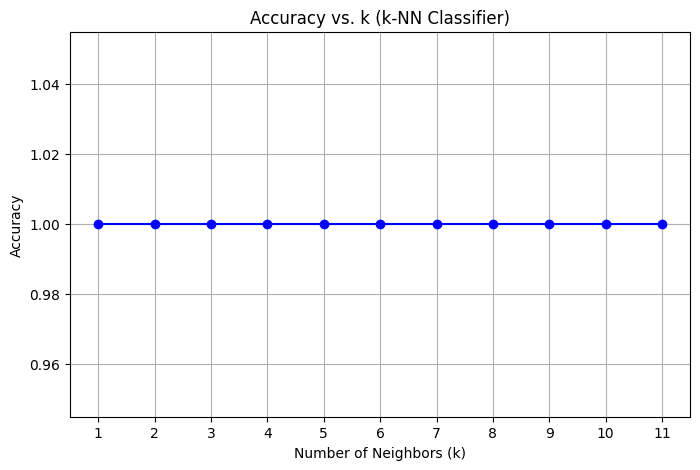

In [26]:
#A8
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []

# Loop for k = 1 to 11
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"k = {k} → Accuracy: {acc:.4f}")

# Plotting the accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 12), accuracies, marker='o', color='blue', linestyle='-')
plt.title("Accuracy vs. k (k-NN Classifier)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

In [27]:
#A9
from sklearn.metrics import confusion_matrix, classification_report

# Train kNN (k = 3 again)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 1. Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# 2. Confusion matrices
print("✅ Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred))

print("\n✅ Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# 3. Classification reports
print("\n📊 Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\n📊 Classification Report (Test):")
print(classification_report(y_test, y_test_pred))


✅ Confusion Matrix (Train):
[[4541]]

✅ Confusion Matrix (Test):
[[1947]]

📊 Classification Report (Train):
              precision    recall  f1-score   support

       Child       1.00      1.00      1.00      4541

    accuracy                           1.00      4541
   macro avg       1.00      1.00      1.00      4541
weighted avg       1.00      1.00      1.00      4541


📊 Classification Report (Test):
              precision    recall  f1-score   support

       Child       1.00      1.00      1.00      1947

    accuracy                           1.00      1947
   macro avg       1.00      1.00      1.00      1947
weighted avg       1.00      1.00      1.00      1947



C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
